## Practical Machine Learning
### Assignment 3:  Evaluating Classification Models

Description: Bank Marketing Study
For this assignment you are asked to fit classification models to data from the Bank Marketing Study, as described in the miller_mds_bank_marketing_study-1.pdf handout. The management problem and suggested analyses are provided (along with R code) in Chapter 3 of Marketing Data Science: Modeling Techniques in Predictive Analytics with R and Python (Miller 2015), provided in the miller_mds_chapter_3_sample.pdf document. For your convenience, the data and jump-start Python code for reading these data are provided in the zip archive: ( jump-start-bank-v003.zip )

Problem Statement: 
Use three binary explanatory variables relating to client banking history: default, housing, and loan. 
- Predict the binary response variable: Has the client subscribed to a term deposit? 
- Use all banking client observations with complete data for these study variables. 

Employ two classification methods: 
(1) logistic regression as described in Chapter 4 of the Géron (2017) textbook and 
(2) naïve Bayes classification. Evaluate these methods within a cross-validation design, 
using the area under the receiver operating characteristic (ROC) curve as an index of classification performance. 
Python scikit-learn should be your primary environment for conducting this research.

Regarding the management problem, imagine that you are advising the bank about machine learning methods to guide telephone marketing campaigns: 
- Which of the two modeling methods would you recommend and why? 
- And, given the results of your research, which group of banking clients appears to be the best target for direct marketing efforts (similar to those used with previous telephone campaigns)? 


Note: Try to see if you can embed this structure ( ML end to end pipeline )
- Look at the big picture.
- Get the data.
- Discover and visualize the data to gain insights.
- Prepare the data for Machine Learning algorithms.
- Select a model and train it.
- Fine-tune your model.
- Present your solution.


Grading Guidelines (50 points)
(1) Data preparation, exploration, visualization (10 points)
(2) Review research design and modeling methods (10 points)
(3) Review results, evaluate models (10 points)
(4) Implementation and programming (10 points)
(5) Exposition, problem description, and management recommendations (10 points)

 
Deliverables and File Formats
- Python notebook that address the problem and the writeup as indicated towards the end of this notebook

OR 

- Create a folder or directory with all supplementary files with your last name at the beginning of the folder name, compress that folder with zip compression, and post the zip-archived folder under the assignment link in Canvas. The following files should be included in an archive folder/directory that is uploaded as a single zip-compressed file. (Use zip, not StuffIt or any 7z or other compression method.)

1. Provide a double-spaced paper with a two-page maximum for the text. The paper should include (1) a summary and problem definition for management; (2) discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed; (3) overview of programming work; and (4) review of results with recommendations for management. (The paper must be provided as an Adobe Acrobat pdf file. MS Word files are NOT acceptable.)

2. Files or links to files should be provided in the format as used by the Python program.

3. Complete program code in Python used to access and analyze the data. The code should be submitted as a plain text file, so it can be executed as a program in a single Python program execution within an interactive Python shell. (You may include a Python notebook in addition to the complete program code.) If there are calls to Python modules, ensure that the directory structure is maintained so that the main program may be fully executed. 

4. Output from the program, such as console listing/logs, text files, and graphics output for visualizations. If you use Professional Studies database servers or systems, include Linux logs of your sessions as plain text files.

5. List file names and descriptions of files in the zip-compressed folder/directory.


Formatting Python Code
Refer to Google's Python Style Guide (Links to an external site.)Links to an external site. for ideas about formatting Python code

Comment often and in detail, highlighting major sections of code, describing the thinking behind the modeling and programming methods being employed.

In [1]:
# Jump-Start for the Bank Marketing Study
# as described in Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python (Miller 2015)

# jump-start code revised by Thomas W. Milller (2017/09/26)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/auto_examples/classification/
#   plot_classifier_comparison.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB.score
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LogisticRegression.html
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#  sklearn.model_selection.KFold.html

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [3]:
###Loading Packages###
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import base packages into the namespace for this program
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from pandas.plotting import scatter_matrix

In [4]:
# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

In [5]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

In [6]:
# initial work with the data set
bank = pd.read_csv('.//jump-start-bank-v003/bank.csv', sep = ';')
# print first few rows of df 
bank.head()
bank.info()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
response     4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [7]:
# examine the shape of original input data
print(bank.shape)

(4521, 17)


In [8]:
# # drop observations with missing data, if any
# bank.dropna()

# examine the shape of original input data
bank.shape

(4521, 17)

In [9]:
# look at the list of column names, note that y is the response
list(bank.columns.values)

# look at the beginning of the DataFrame
bank.head()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
# Descriptive Statistics for non-categorical variables
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


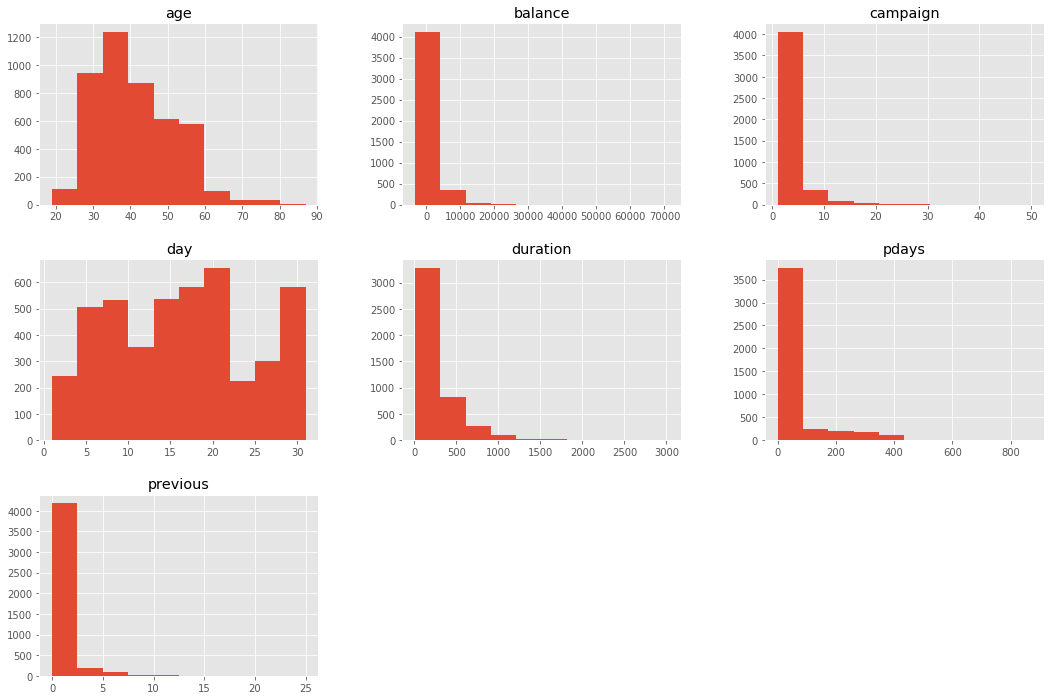

In [11]:
# Check distributions of non-categorical variables
bank.hist(figsize=(18,12));

In [12]:
bank['response'].value_counts()

no     4000
yes     521
Name: response, dtype: int64

<Figure size 432x288 with 0 Axes>

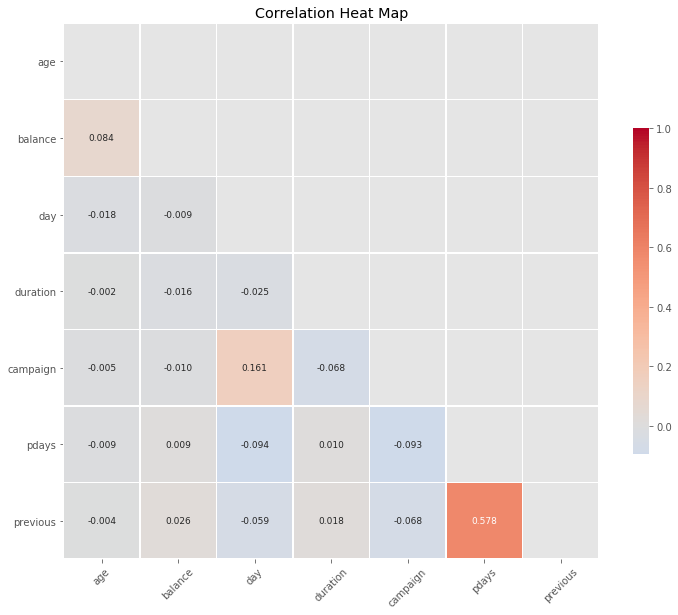

In [13]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

# examine correlations
corr_chart(df_corr = bank) 

In [14]:
# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

# define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)

# define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)

# define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)

# define response variable to use in the model
response = bank['response'].map(convert_to_binary)

# gather three explanatory variables and response into a numpy array 
# here we use .T to obtain the transpose for the structure we want
model_data = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T

# examine the shape of model_data, which we will use in subsequent modeling
print(model_data.shape)

(4521, 4)


In [15]:
#Check "model_data" structure
print(model_data)

[[0 0 0 0]
 [0 1 1 0]
 [0 1 0 0]
 ...
 [0 0 0 0]
 [0 0 0 0]
 [0 1 1 0]]


In [16]:
# Check the frequency of "default", "loan", "housing" by "response"
(pd.crosstab([bank['default'],bank['loan'],bank['housing']], [bank['response']], margins=True))

# pd.crosstab([bank['default'],bank['loan'],bank['housing']],columns=bank['response'])

# # Check the frequency of "default", "loan", "housing" by "response"
# print(pd.crosstab([bank['default'],bank['loan'],bank['housing']], [bank['response']], margins=True))

response                no  yes   All
default loan housing                 
no      no   no       1381  279  1660
             yes      1927  192  2119
        yes  no        255   16   271
             yes       370   25   395
yes     no   no         13    4    17
             yes        31    3    34
        yes  no         12    2    14
             yes        11    0    11
All                   4000  521  4521

In [17]:
ct = (pd.crosstab([bank['default'],bank['loan'],bank['housing']], 
                  [bank['response']], margins=True))
ct_nm = (pd.crosstab([bank['default'],bank['loan'],bank['housing']], 
                  [bank['response']], margins=False))
ct2 = pd.crosstab(bank.response,bank.default)
ct3 = pd.crosstab(bank.response,bank.loan)
ct4 = pd.crosstab(bank.response,bank.housing)

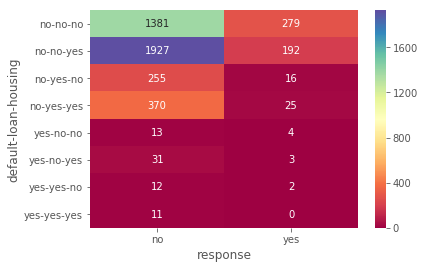

<Figure size 432x288 with 0 Axes>

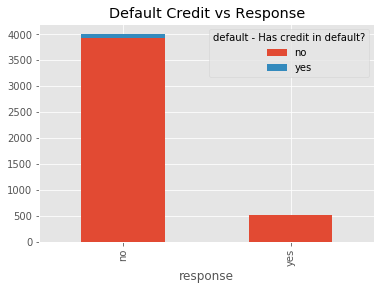

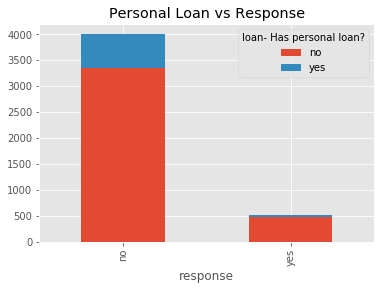

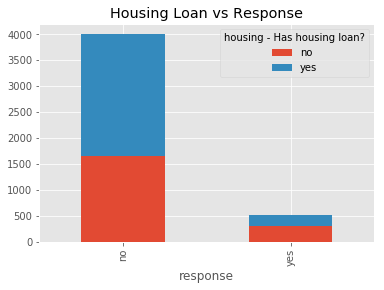

In [18]:
plt.figure()
sns.heatmap(ct_nm,cmap="Spectral", annot=True, cbar=True,fmt='g');

plt.figure()
ct2.plot.bar(stacked=True)
plt.legend(title='default - Has credit in default?')
plt.title("Default Credit vs Response")
plt.show();

ct3.plot.bar(stacked=True)
plt.legend(title='loan- Has personal loan?')
plt.title("Personal Loan vs Response")
plt.show();

ct4.plot.bar(stacked=True)
plt.legend(title='housing - Has housing loan?')
plt.title("Housing Loan vs Response")
plt.show();


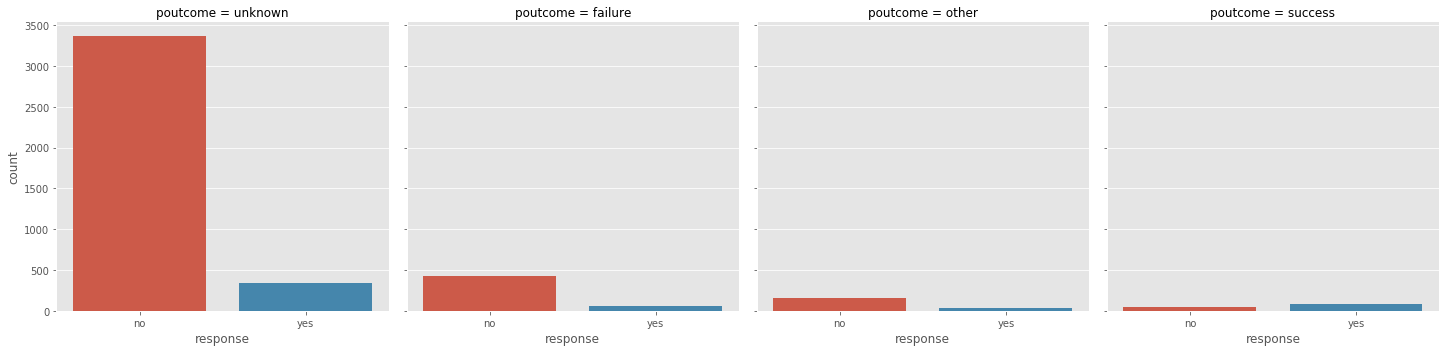

In [19]:
sns.catplot(x="response", col="poutcome", data=bank, kind="count")

####  The rest of the program should set up the modeling methods & evaluation within a cross-validation design

In [20]:
# shuffle is by the first index, which is the rows
np.random.seed(RANDOM_SEED)
# np.random.shuffle(model_data)

# dimensions of the additive model X input and y response
print('\nData dimensions:', model_data.shape)

# --------------------------------------------------------


Data dimensions: (4521, 4)


In [21]:
# cross-validation scoring code adapted from Scikit Learn documentation
from sklearn.metrics import roc_auc_score

# specify the set of classifiers being evaluated
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
names = ["Naive_Bayes", "Logistic_Regression"]
classifiers = [BernoulliNB(alpha=1.0, binarize=0.5, 
                           class_prior = [0.5, 0.5], fit_prior=False), 
               LogisticRegression()]

In [22]:
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold


# ten-fold cross-validation employed here
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   note that 0:model_data.shape[1]-1 slices for explanatory variables
#   and model_data.shape[1]-1 is the index for the response variable    
    X_train = model_data[train_index, 0:model_data.shape[1]-1]
    X_test = model_data[test_index, 0:model_data.shape[1]-1]
    y_train = model_data[train_index, model_data.shape[1]-1]
    y_test = model_data[test_index, model_data.shape[1]-1]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, clf in zip(names, classifiers):
        print('\nClassifier evaluation for:', name)
        print('  Scikit Learn method:', clf)
        clf.fit(X_train, y_train)  # fit on the train set for this fold
        # evaluate on the test set for this fold
        y_test_predict = clf.predict_proba(X_test)
        fold_method_result = roc_auc_score(y_test, y_test_predict[:,1]) # Select the second column
        print('Area under ROC curve:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      '\nMethod                 Area under ROC Curve', sep = '')     
print(cv_results_df.mean())   



Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4068, 3)
X_test: (453, 3)
y_train: (4068,)
y_test: (453,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.5878522062732588

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.5878522062732588

Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.633727778967659

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.633727778967659

Fold index: 2 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.6575354454752319

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.6575354454752319

Fold index: 3 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.6373879576644552

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.6355648959335594

Fold index: 4 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.5743993962517295

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.5743993962517295

Fold index: 5 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.5746839950151327

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.5842383241350662

Fold index: 6 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.5625116322352502

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.5625116322352502

Fold index: 7 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.7311441622103387

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.7311441622103387

Fold index: 8 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.5735328888258382

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.5735328888258382

Fold index: 9 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.5778268860493612

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.5768204095921582

----------------------------------------------
Average results from 10-fold cross-validation

Method                 Area under ROC Curve
Naive_Bayes            0.611060
Logistic_Regression    0.611733
dtype: float64


### Bank Marketing Study: 
Imagine that you are advising the bank about machine learning methods to guide telephone marketing campaigns: 
- Which of the two modeling methods would you recommend and why? 
- And, given the results of your research, which group of banking clients appears to be the best target for direct marketing 
  efforts (similar to those used with previous telephone campaigns)? 

#### REPORT/FINDINGS: 

##### (1) A summary and problem definition for management; 

For the Bank Marketing Study, we are advising the bank about machine learning methods to guide telephone marketing campaigns. We evaluated two classifiers, Naive Bayes and Logistic Regression, using three binary explanatory variables related to client banking history and predicted the binary response variable, whether or not the client subscribed to a term deposit.

---
##### (2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed; 

For this assignment, we were asked to fit two classification models to data from the Bank Marketing Study. We employed two classification methods: (1) logistic regression and (2) naïve bayes classification. We used three binary explanatory variables related to client banking history: default, housing, and loan. We used all banking client observations with complete data for these study variables. We predicted the binary response variable: Has the client subscribed to a term deposit? We evaluated these methods within a cross-validation design, using the area under the receiver operating characteristic (ROC) curve as an index of classification performance. 

---
##### (3) Overview of programming work; 

The Bank Marketing Study data was read into python and we looked at the structure/shape of the data, specifically data types and counts for each variable and verified there was no missing data. We viewed the list of column names and noted the response variable, and reviewed descriptive statistics for non-categorical variables. Since we are using binary classifiers, in order to prepare the variables for the classification model, we mapped a function to convert text yes/no answers to integers 1/0. We then converted the three explanatory variables of interest ('default','housing', and 'loan'), as well as the response variable, from text to integer values. We used these variables to create a new dataset, "model_data" which we subsequently used for the actual modeling. We looked at frequencies of the 4 variables in crosstabs, and also used crosstabs to create a heatmap. We also plotted counts of the explanatory variables against the response variable. Finally, we set up the modeling methods & evaluation within a cross-validation design. We iterated through both models, and used the area under ROC curve as the performance metric to evaluate the two models. 

---
##### (4) Review of results with recommendations for management.
The metric we were asked to use for model evaluation was the area under the curve (AUC) in the ROC curve. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. In our case, the AUC ROC for both classifiers turned out to be extremely close; 0.611060 for Naive Bayes and  0.611733 for Logistic_Regression. Using this metric alone, our recommendation to management should be that the models are pretty equivalent in terms of predictive accuracy. However, based on the ROC AUC values we found, these models are only slightly better than random. 

One thing to note, is that this dataset is not balanced in terms of the distribution of the response variable; the response variable is heavily skewed with most observations being 'no'. We know that AUC ROC is not the best metric to use if the dataset is skewed, or there isn’t a balanced distribution of classes. For unevenly distributed datasets, it may be better to use a PR curve, which plots precision vs recall. Additionally, we may want to review multiple performance metrics, before we make our final recommendation to management. 
